In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np
data = pd.read_csv("household_power_consumption.csv")
# data = data.loc['1985-01-01':]

data.head()

/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/cooldudeanmol/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16-12-2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [2]:
data['Date'] = data['Date'].astype('str')
data['Time'] = data['Time'].astype('str')
data['Date'] = data['Date'] + ' '+ data['Time']

data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006 17:24:00,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16-12-2006 17:25:00,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16-12-2006 17:26:00,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16-12-2006 17:27:00,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16-12-2006 17:28:00,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y %H:%M:%S" )
# data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y" )
data.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
# data.set_index('Date', inplace=True)
data = data.assign(Date=data.Date.dt.round('H'))
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:00:00,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:00:00,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:00:00,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:00:00,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:00:00,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
data.index = pd.to_datetime(data.index)
data = data.reset_index().drop_duplicates(subset='Date', keep='last').set_index('Date')

data.head()

,index,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,,
2006-12-16 17:00:00,1970-01-01 00:00:00.000000005,17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 18:00:00,1970-01-01 00:00:00.000000066,18:30:00,2.930,0.000,236.150,12.400,0.000,1.000,17.0
2006-12-16 19:00:00,1970-01-01 00:00:00.000000125,19:29:00,3.614,0.192,233.920,15.400,0.000,5.000,17.0
2006-12-16 20:00:00,1970-01-01 00:00:00.000000186,20:30:00,3.262,0.076,234.540,13.800,0.000,0.000,17.0
2006-12-16 21:00:00,1970-01-01 00:00:00.000000245,21:29:00,3.420,0.000,237.730,14.200,0.000,0.000,17.0


In [6]:
data = data['Global_active_power']
data.head()

Date
2006-12-16 17:00:00    3.520
2006-12-16 18:00:00    2.930
2006-12-16 19:00:00    3.614
2006-12-16 20:00:00    3.262
2006-12-16 21:00:00    3.420
Name: Global_active_power, dtype: object

In [7]:
data.columns = ['Energy Production']
data.columns


['Energy Production']

In [8]:
data = data[data != '?']
data.head()

Date
2006-12-16 17:00:00    3.520
2006-12-16 18:00:00    2.930
2006-12-16 19:00:00    3.614
2006-12-16 20:00:00    3.262
2006-12-16 21:00:00    3.420
Name: Global_active_power, dtype: object

In [9]:
len(data)

34155

In [10]:
# data['Energy Production'] = data['Energy Production'].astype('float64')
data = data.astype('float64')
data.head()

Date
2006-12-16 17:00:00    3.520
2006-12-16 18:00:00    2.930
2006-12-16 19:00:00    3.614
2006-12-16 20:00:00    3.262
2006-12-16 21:00:00    3.420
Name: Global_active_power, dtype: float64

In [11]:
import numpy as np
print('Min', np.min(data))
print('Max', np.max(data))

Min 0.078
Max 9.686


In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(data)
scaled = scaler.fit_transform(np.array(data).reshape(-1, 1))

In [13]:
# !pip3 install plotly
# !pip3 install cufflinks

In [14]:
#importing Pandas 
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
from  plotly.offline import plot_mpl
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data.iplot(title="power")

In [15]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))


Min 0.0
Max 0.9999999999999999


In [16]:
len(scaled)
scaled[:5]
# !pip3 install pyramid-arima


array([[0.35824313],
       [0.29683597],
       [0.36802664],
       [0.33139051],
       [0.34783514]])

In [17]:
train_size = int(len(scaled)*.7)
test_size = int(len(scaled - train_size))
train, test = scaled[:train_size, :], scaled[train_size:, :]

print(len(train), len(test))

23908 10247


In [18]:
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[(i+look_back), 0])
        
    return np.array(dataX), np.array(dataY)

In [19]:
look_back = 12
Xtrain, Ytrain = create_dataset(train, look_back)
Xtest, Ytest = create_dataset(test, look_back)

In [20]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))
print(Xtrain.shape)
print(Xtest.shape)

(23895, 12, 1)
(10234, 12, 1)


In [21]:
batch_size = 1000

# model = Sequential()
# layers = [1, 75, 100, prediction_steps]
# model.add(LSTM(layers[1], input_shape=(None, layers[0]), return_sequences=True))  # add first layer
# model.add(Dropout(0.2))  # add dropout for first layer
# model.add(LSTM(layers[2], return_sequences=False))  # add second layer
# model.add(Dropout(0.2))  # add dropout for second layer
# model.add(Dense(layers[3]))  # add output layer
# model.add(Activation('linear'))  # output layer with linear activation
    
    
# model = Sequential()
# model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=1))
# model.add(Dense(1))
# model.compile(loss = 'mean_squared_error', optimizer='adam')
# model.fit(Xtrain, Ytrain, epochs=100, batch_size=batch_size, verbose = 2, shuffle=True)

model = Sequential()
model.add(LSTM(75, input_shape=(None, 1), return_sequences=True))  # add first layer
model.add(Dropout(0.2))  # add dropout for first layer
model.add(LSTM(100, return_sequences=False))  # add second layer
model.add(Dropout(0.2))  # add dropout for second layer
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer='adam')
model.fit(Xtrain, Ytrain, epochs=10, batch_size=batch_size, verbose = 2, shuffle=True)






Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
 - 7s - loss: 0.0130
Epoch 2/10
 - 6s - loss: 0.0115
Epoch 3/10
 - 5s - loss: 0.0110
Epoch 4/10
 - 5s - loss: 0.0105
Epoch 5/10
 - 5s - loss: 0.0099
Epoch 6/10
 - 5s - loss: 0.0096
Epoch 7/10
 - 5s - loss: 0.0094
Epoch 8/10
 - 5s - loss: 0.0094
Epoch 9/10
 - 5s - loss: 0.0094
Epoch 10/10
 - 5s - loss: 0.0094


In [22]:
model.save('UCI_household.h5')

In [23]:


import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(Xtrain, batch_size = batch_size)
# model.reset_states()
testPredict = model.predict(Xtest, batch_size = batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

# trainPredict = scaler.inverse_transform(np.array(trainPredict).reshape(-1, 1))
# testPredict = scaler.inverse_transform(np.array(testPredict).reshape(-1, 1))


ytrain = scaler.inverse_transform([Ytrain])
ytest = scaler.inverse_transform([Ytest])
    
trainScore = math.sqrt(mean_squared_error(ytrain[0], trainPredict[:,0]))    
print("train Score", trainScore)

testScore = math.sqrt(mean_squared_error(ytest[0], testPredict[:,0]))    
print("train Score", testScore)
print(ytest[0])

train Score 0.9252951394703005
train Score 0.842722870704719
[0.36  2.206 1.474 ... 1.822 1.932 0.98 ]


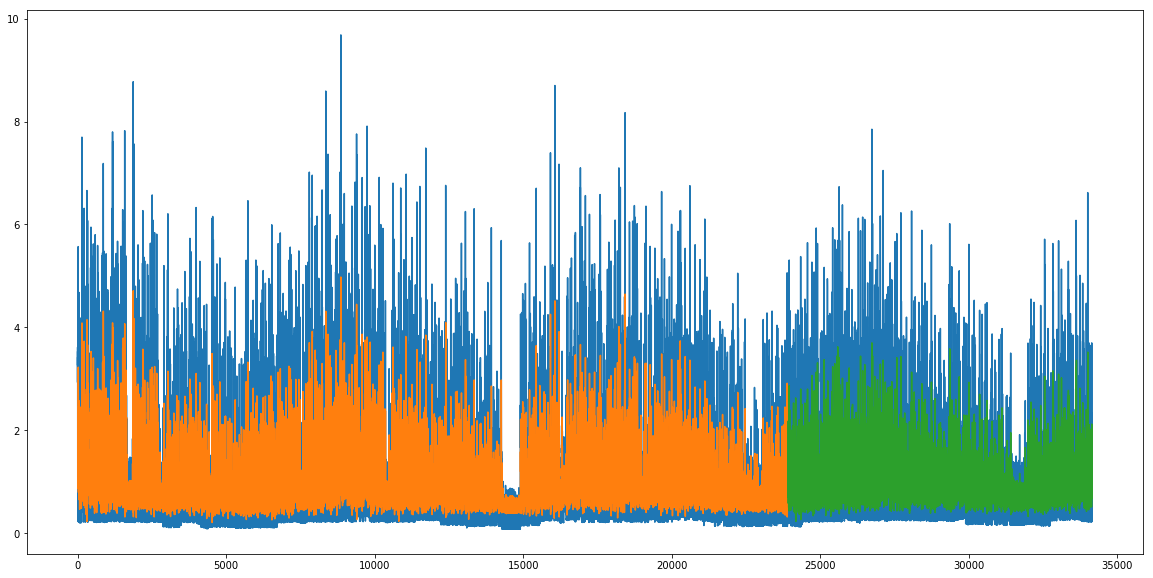

In [24]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict

plt.figure(figsize = (20, 10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()